# Practice Session : Kalman Filter
# Arnaud Capitan

In this session, we will code our own Kalman filter and try to study and apply it on simulated data. 
The first part is dedicated to code a Linear Gaussian Model simulator while the Second Part is about coding the Kalman Filter.

## 1 - Linear Gaussian Model (LGM) Simulation

Let's consider at first the following Linear Gaussian Model (LGM) :

$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad (1)
$$

where the entries $X_0, (\epsilon_k)_{k\geq 0}, (\eta_k)_{k\geq 0}$ are independents.

The code hereafter generate $(X_{k+1}, Y_{k+1})$ knowning $X_k$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lingauss_step(x_current, Phi, Psi, Q, R):
    """
    Generate (X_{k+1}, Y_{k+1}) in the linear Gaussian model.
    Arguments:
    Phi, Psi: matrices defining the state dynamics and observation model (of sizes (p,p) and (q,p) respectively)
    Q, R: variances of the noise for the state equation and observation equation.
    x_current: vector of size p
    Returns:
    x: a column vector (dimensions (p,1))
    y: a column vector (dimensions (q,1))
    """
    dim_state = len(x_current)
    dim_obs = Psi.shape[0]
    x_current = np.reshape(x_current, (dim_state, 1))
    mean_state = np.dot(Phi, x_current)
    x = my_mvnormrnd(mean_state, Q, 1)
    x = np.reshape(x, (dim_state, 1))
    mean_obs = np.dot(Psi, x)
    y = my_mvnormrnd(mean_obs, R, 1)
    y = np.reshape(y, (dim_obs, 1))
    return x, y

def my_mvnormrnd(mean, cov, num_samples):
    """
    Generate samples from a multivariate normal distribution.
    mean: mean vector
    cov: covariance matrix
    num_samples: number of samples to generate
    Returns:
    samples: generated samples
    """
    samples = np.random.multivariate_normal(mean.flatten(), cov, num_samples).T
    return samples


# # Define parameters
# x_0 = np.array([[1], [2], [3]])
# Phi = 0.1 * np.array([[1, 1, 0], [0, 1, 1], [0, 0, 1]])
# Psi = np.array([[1, 0, 0], [0, 1, 1]])
# cholQ = np.array([[0.5, 0.5, 0.5], [0, 1, 1], [0, 0, 1]])
# Q = np.dot(cholQ, cholQ.T)
# cholR = 0.5 * np.array([[1, 1], [0, 2]])
# R = np.dot(cholR, cholR.T)

# # Perform one iteration in the model
# x, y = lingauss_step(x_0, A, B, Q, R)
# print("x:", x)
# print("y:", y)

The function `lingauss_simul` is made to generate sample $(X_k, Y_k)_{k=1}^{T}$ for a fixed $T$ and given $x_0$.

In [2]:
def lingauss_simul(x_0, T, Phi, Psi, Q, R):
    """
    Generate the process ((X_{k}, Y_{k}), k = 1:T) in the linear Gaussian model.
    Arguments:
    Phi, Psi: Matrices defining the state dynamics and observation model (of sizes resp. (p,p) and (q,p))
    Q, R: Variances of the noise for the state equation and observation equation.
    x_0: Initial state
    T: Number of iterations
    Returns:
    X: a matrix of size (T,p)
    Y: a matrix of size (T,q)
    """
    dim_state = Phi.shape[0]
    dim_obs = Psi.shape[0]
    X = np.zeros((T, dim_state))
    Y = np.zeros((T, dim_obs))
    x = x_0

    for i in range(T):
        x, y = lingauss_step(x, Phi, Psi, Q, R)
        X[i, :] = x.flatten()
        Y[i, :] = y.flatten()

    return X, Y

1. <span style="font-weight:bold;">Application :</span> We consider states $X_{k}=(X_{k,1}, X_{k,2}, X_{k,3})$ and observation $Y_{k} = (Y_{k,1}, Y_{k,2})$ with $i \in \{1,2,3\}$ and $j \in \{1,2\}$:

\begin{cases}
X_{k+1, i} = X_{k,i} + \epsilon_{k,i} & \text{with } \epsilon_{k,i} \sim \mathcal{N}(0,\tau^2) \\
Y_{k+1, j} = X_{k+1,j} + \eta_{k, j} & \text{with } \eta_{k,j} \sim \mathcal{N}(0,\sigma^2)
\end{cases} \qquad \qquad \qquad (2)
<span style="font-weight:bold; color:red;">Answer the following questions:</span><br>
    1.1 Write the model in Eq. (2) under the form of Eq. (1) by specifying the parameters $\Phi, \Psi, Q$ and $R$.<br>
    1.2 Complete the following code to show trajectory of $T=100$ observations at first. Comment.<br>
    1.3 Varying the paramters $\sigma,\tau $ and $T$ and comment the results.<br>
___

Question 1.1]

We have for Eq. (1) the following Linear Gaussian Model (LGM) :

$$
\begin{cases}
X_0 \sim \mathcal{N}(m_0,P_0) \\
X_{k+1} = \Phi X_k + \epsilon_k\\
Y_{k+1} = \Psi X_{k+1} + \eta_{k+1} \\
\epsilon_k \sim \mathcal{N}(0,Q) \\
\eta_k \sim \mathcal{N}(0, R) 

\end{cases}\qquad \qquad \qquad (1)
$$

where the entries $X_0, (\epsilon_k)_{k\geq 0}, (\eta_k)_{k\geq 0}$ are independents.

We consider states $X_{k}=(X_{k,1}, X_{k,2}, X_{k,3})$ and observation $Y_{k} = (Y_{k,1}, Y_{k,2})$ with $i \in \{1,2,3\}$ and $j \in \{1,2\}$:

\begin{cases}
X_{k+1, i} = X_{k,i} + \epsilon_{k,i} & \text{with } \epsilon_{k,i} \sim \mathcal{N}(0,\tau^2) \\
Y_{k+1, j} = X_{k+1,j} + \eta_{k, j} & \text{with } \eta_{k,j} \sim \mathcal{N}(0,\sigma^2)
\end{cases} \qquad \qquad \qquad (2)

We then identify each parameter :

$$Q = \tau^2I_3$$
$$R = \sigma^2I_2$$
$$\Phi = I_3$$
$$\Psi = \begin{bmatrix} 
1 & 0 & 0 \\ 
0 & 1 & 0
\end{bmatrix}
$$

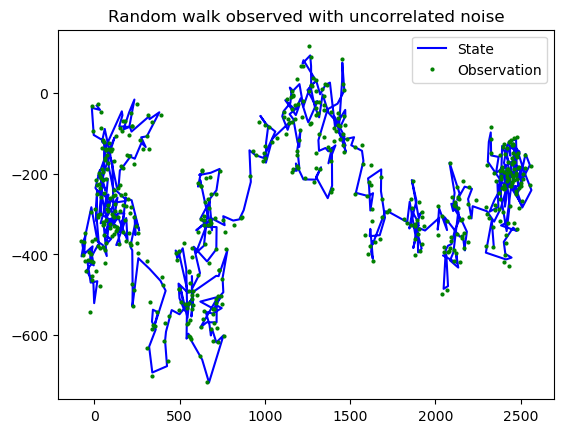

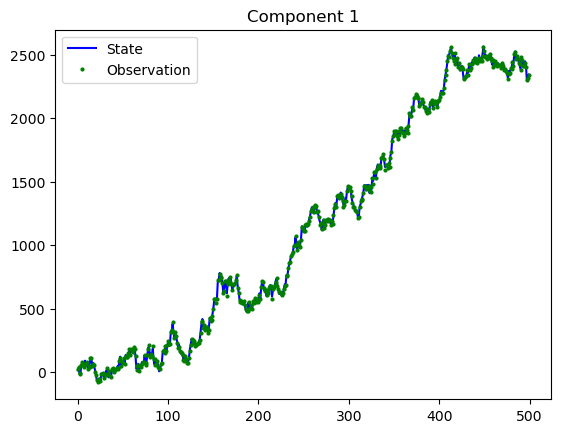

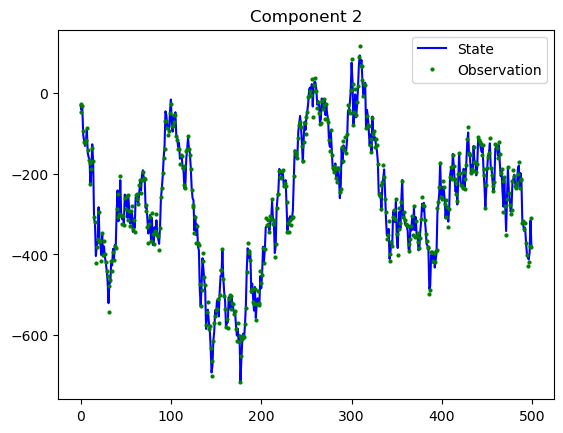

In [15]:
# A-1 parameters to modify
sigma = 10
tau = 40
x_0 = np.array([1, 2, -1])
T = 500

# A-2 structural parameters
Phi = np.eye(3)  # Replace with appropriate matrix for state model
Psi = np.array([[1,0,0],[0,1,0]])  # Replace with appropriate matrix for observation model
Q = tau**2*np.eye(3) # Replace with appropriate covariance matrix for state equation
R = sigma**2*np.eye(2)  # Replace with appropriate covariance matrix for observation equation


# Perform simulation
X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)

# Visualization
plt.figure(1)
plt.plot(X[:, 0], X[:, 1], 'b', label='State')
plt.plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
plt.legend()
plt.title('Random walk observed with uncorrelated noise')
plt.show()

for i in range(2):
    plt.figure(i+2)
    plt.plot(X[:, i], 'b', label='State')
    plt.plot(Y[:, i], 'og', label='Observation', markersize=2)
    plt.title(f'Component {i+1}')
    plt.legend()
    plt.show()    

Question 1.2]

Since $\tau² \geq \sigma²$, the noise added to the observation (of variance $\sigma²$) is less likely to drastically change the state values whereas the state values are reaching really high and low values : even with the observation noise, the observation is following the state curve.

___

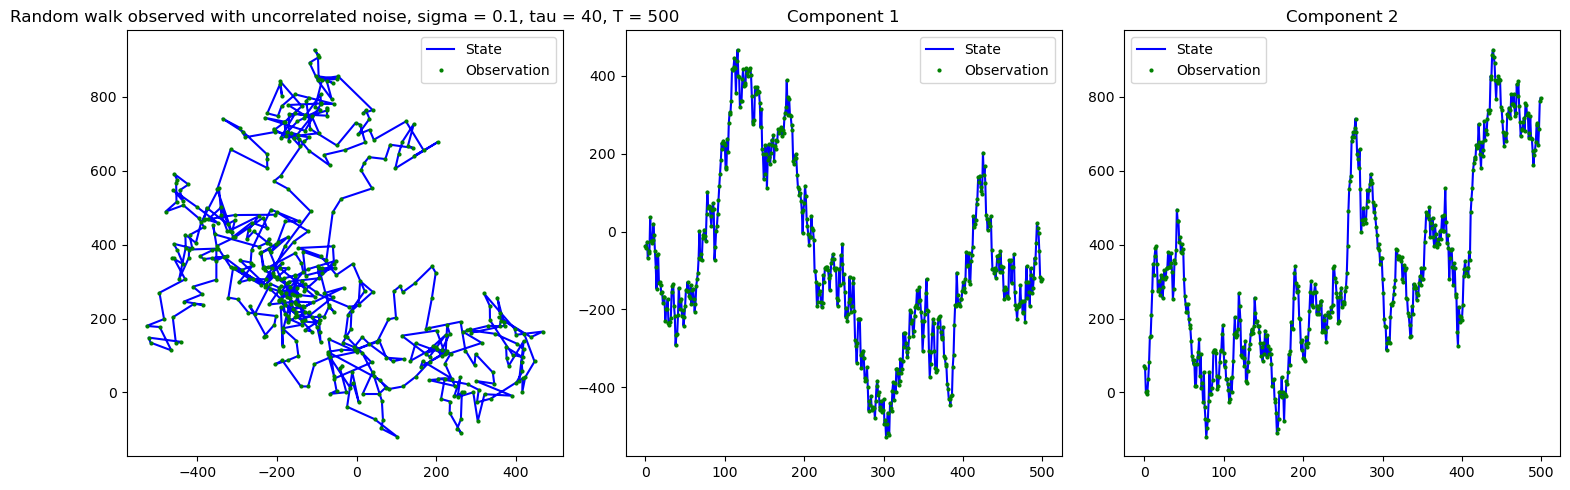

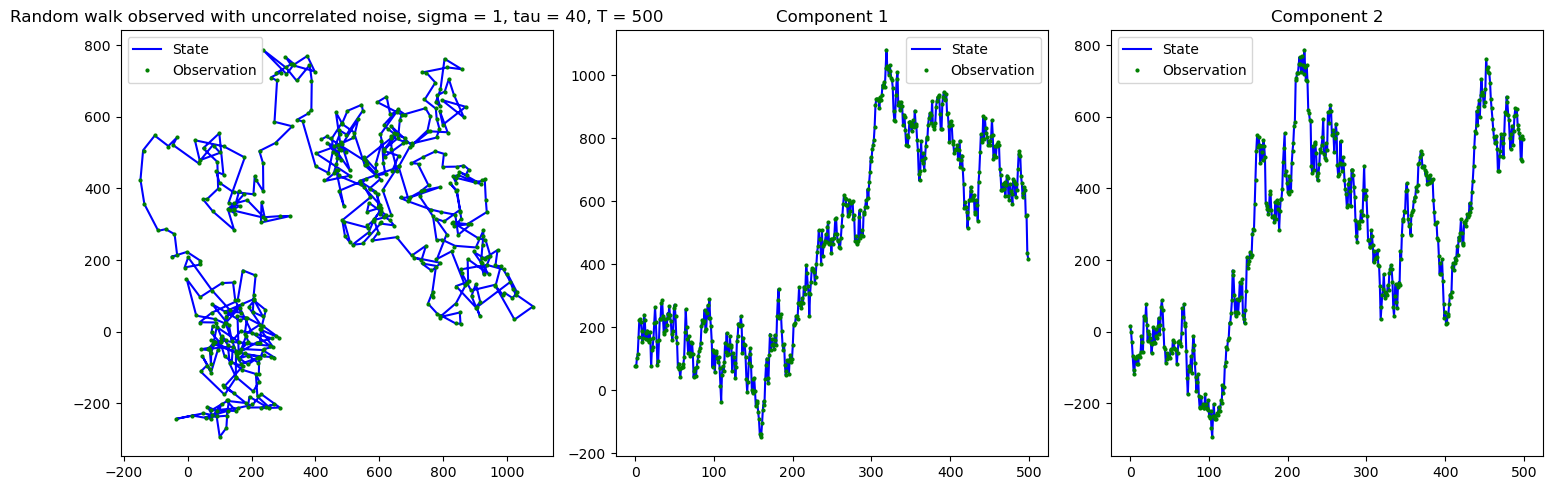

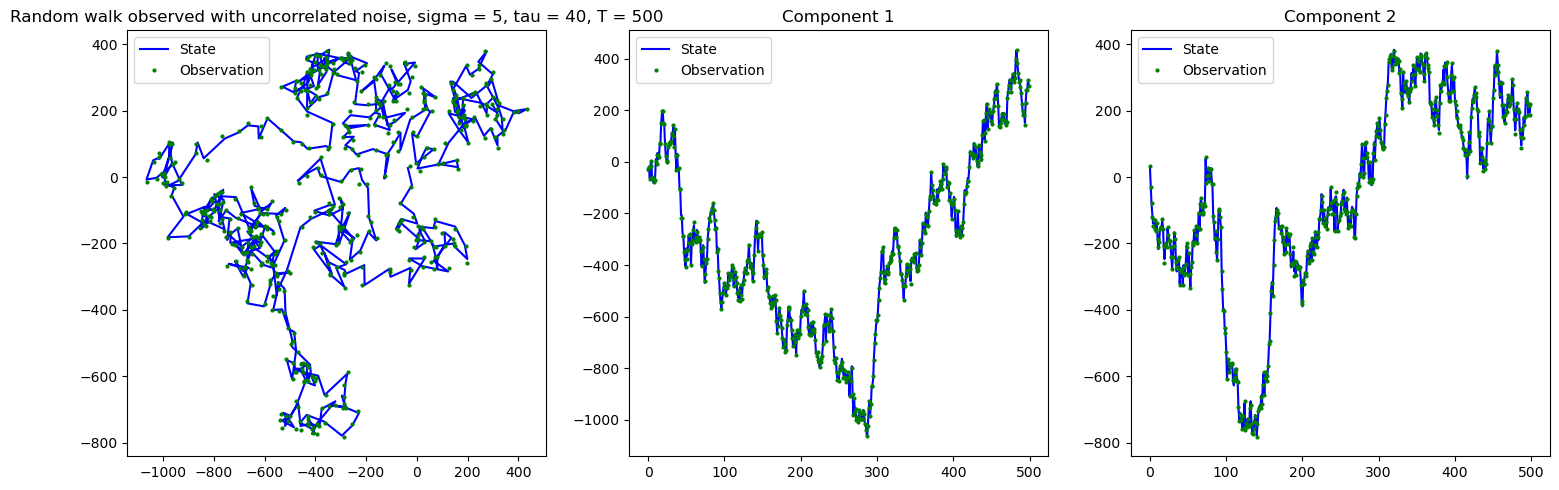

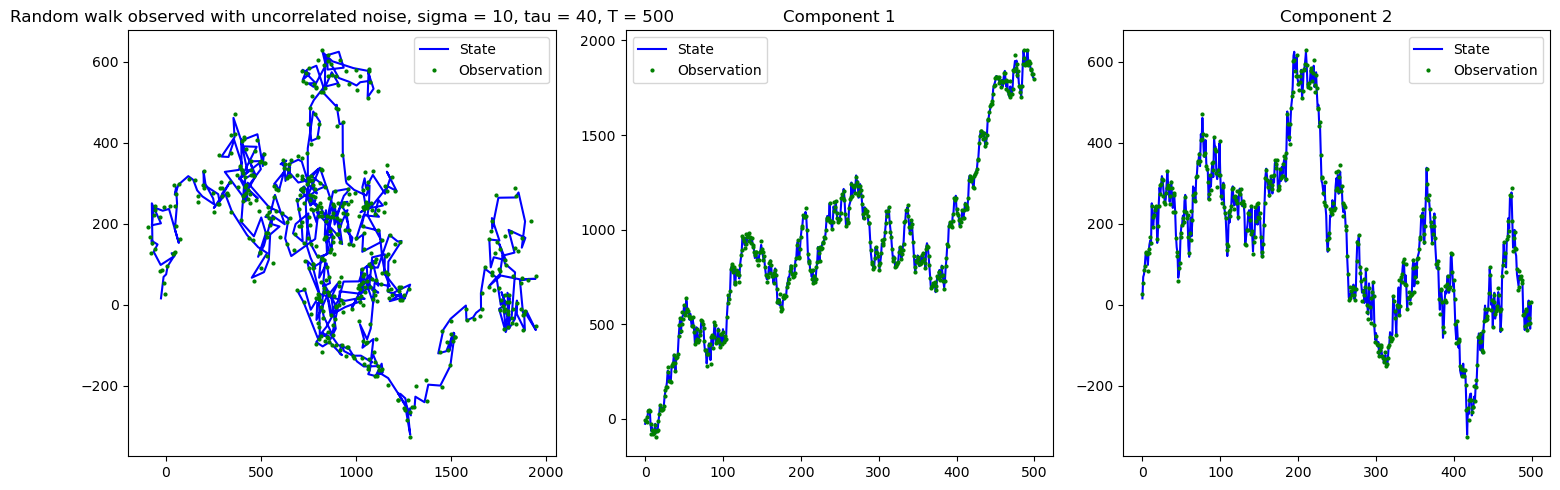

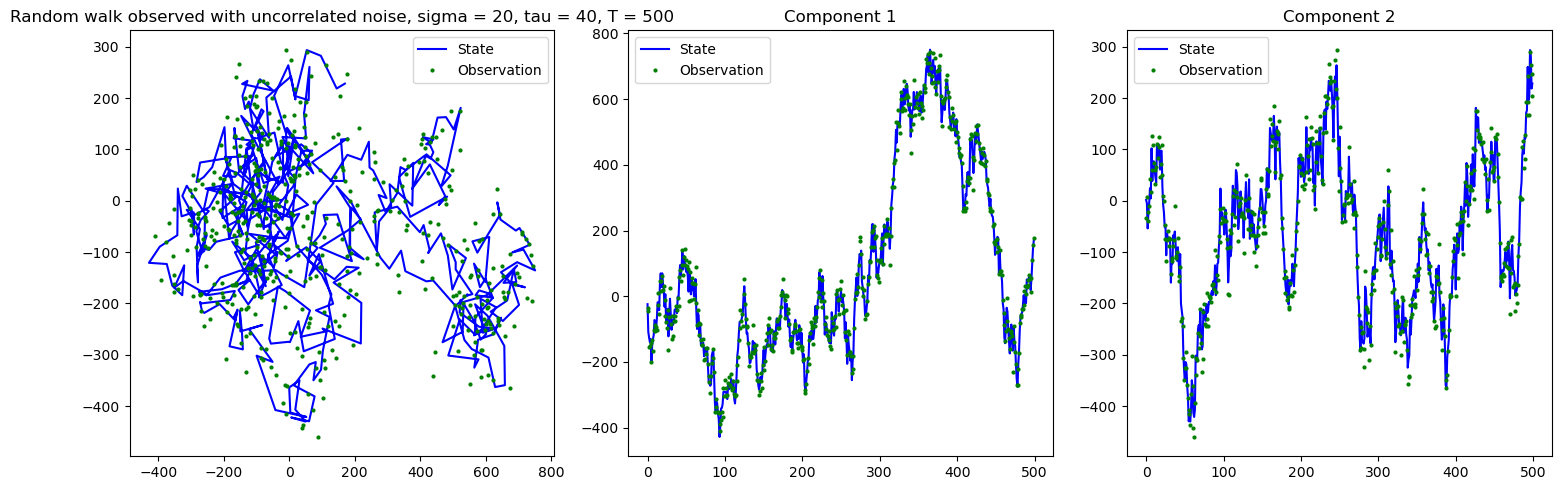

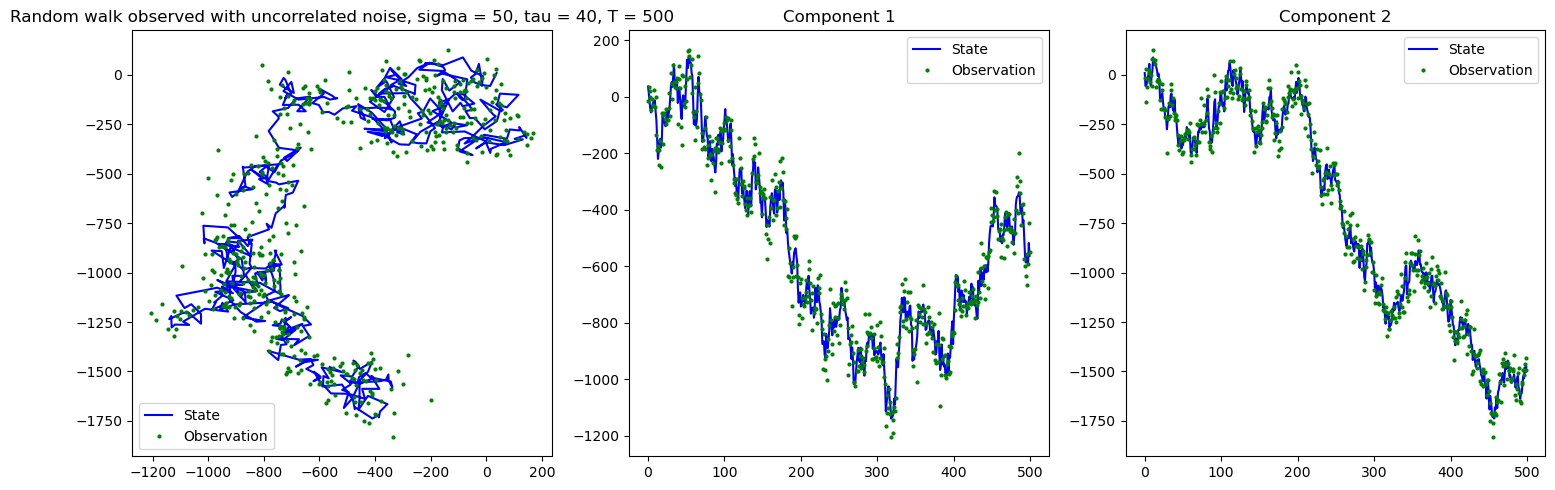

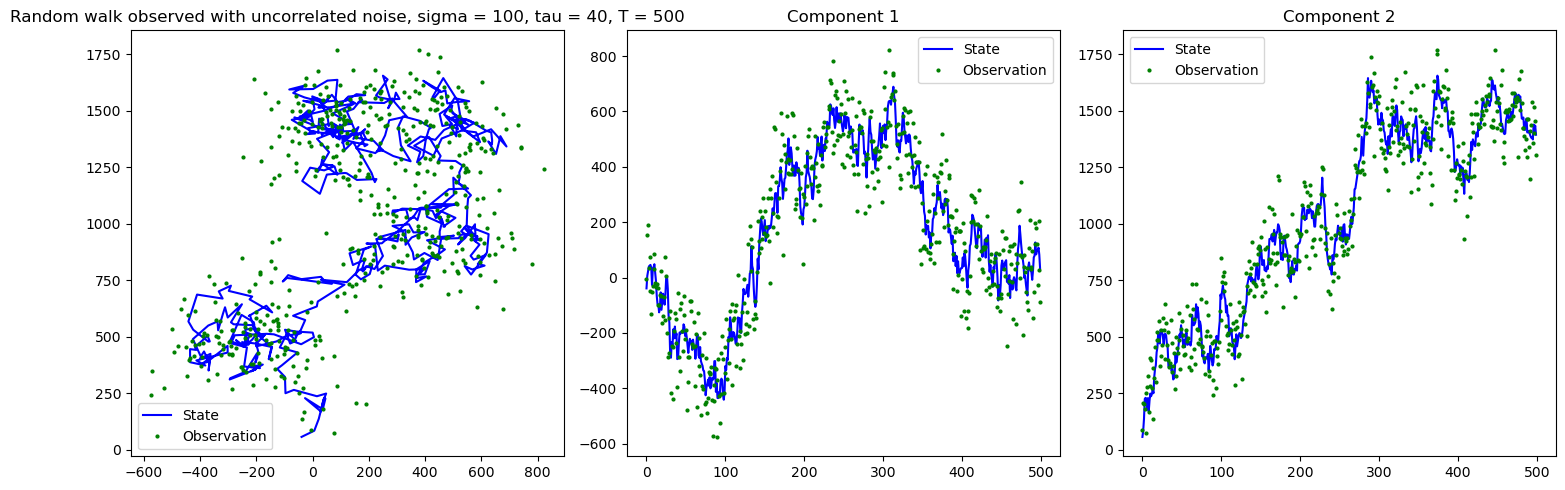

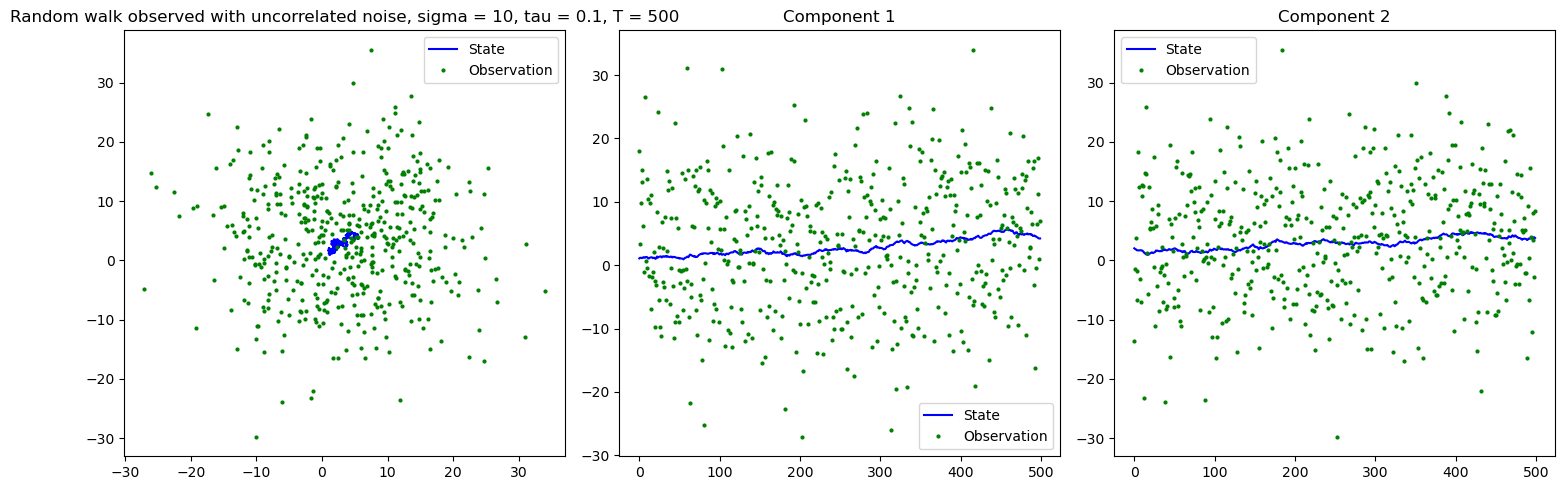

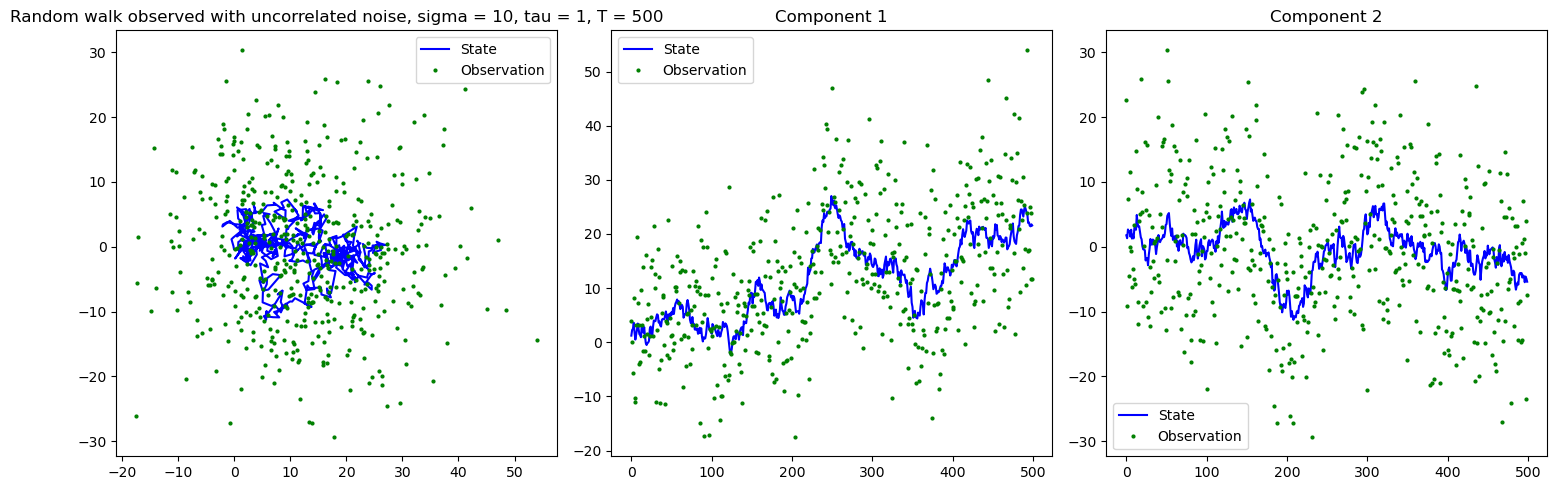

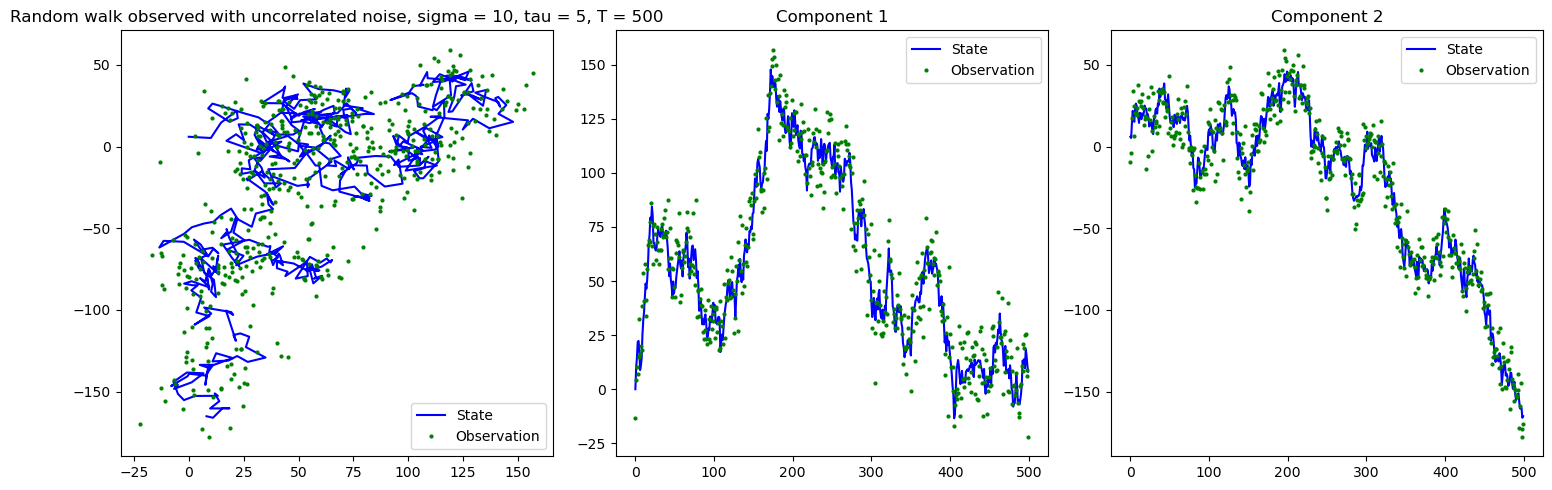

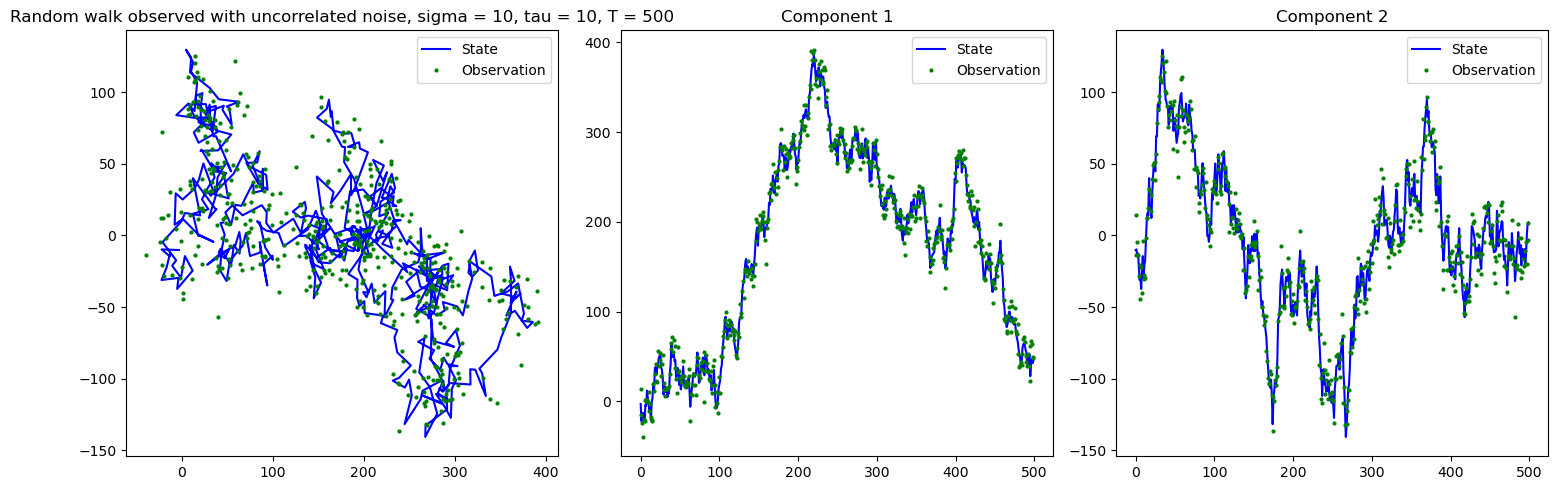

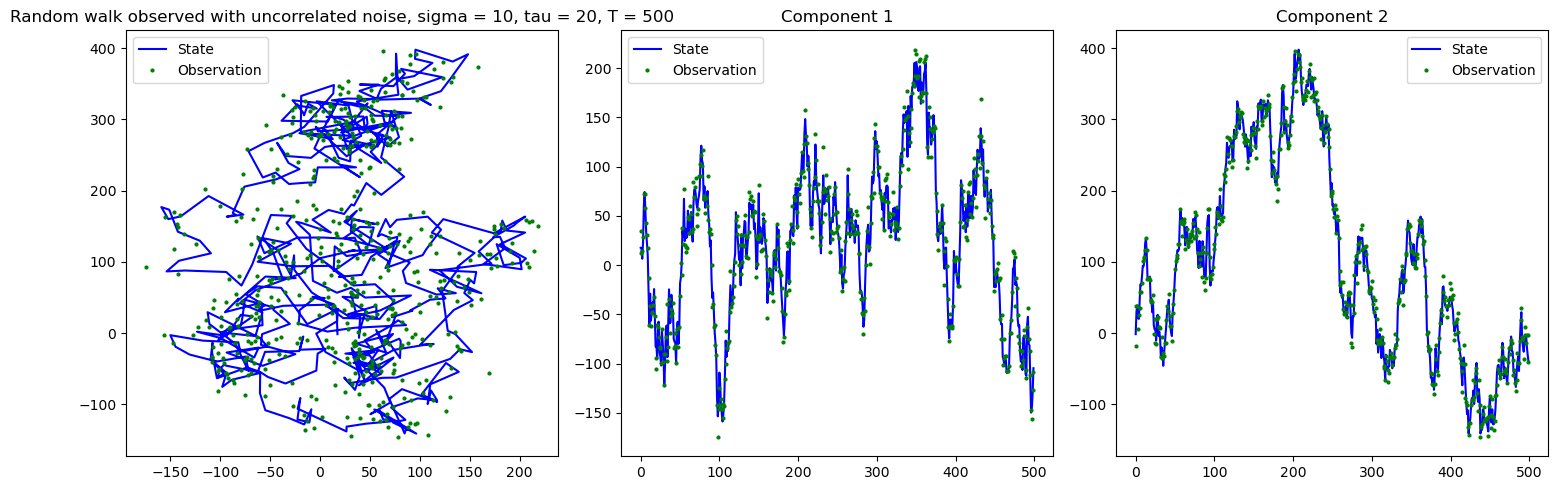

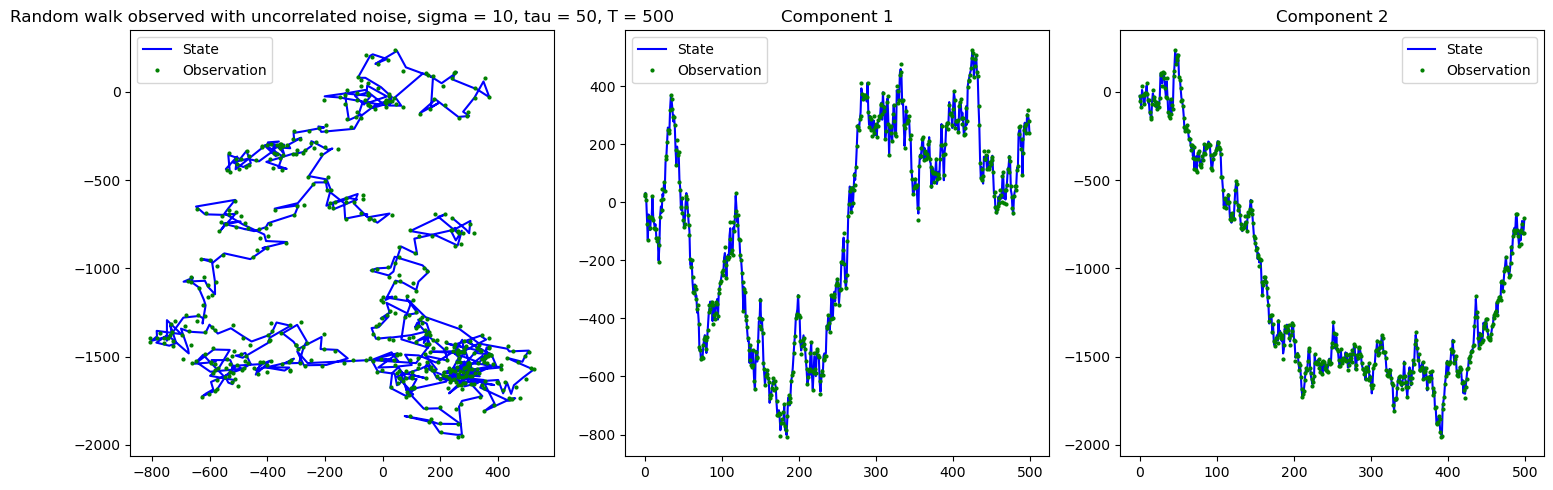

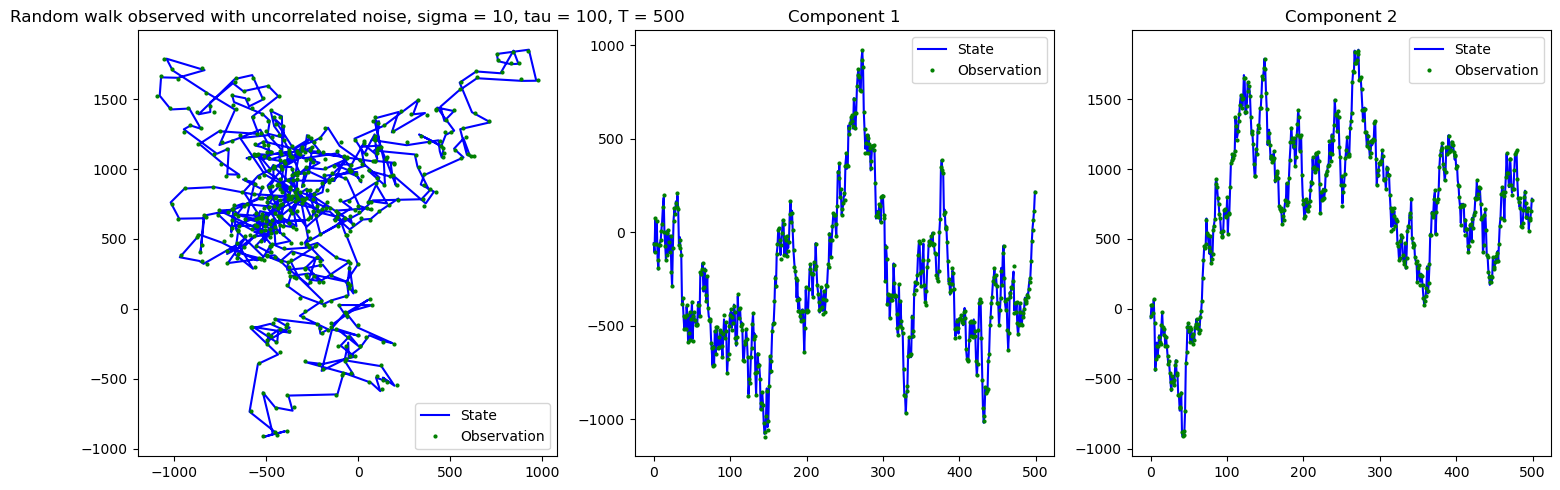

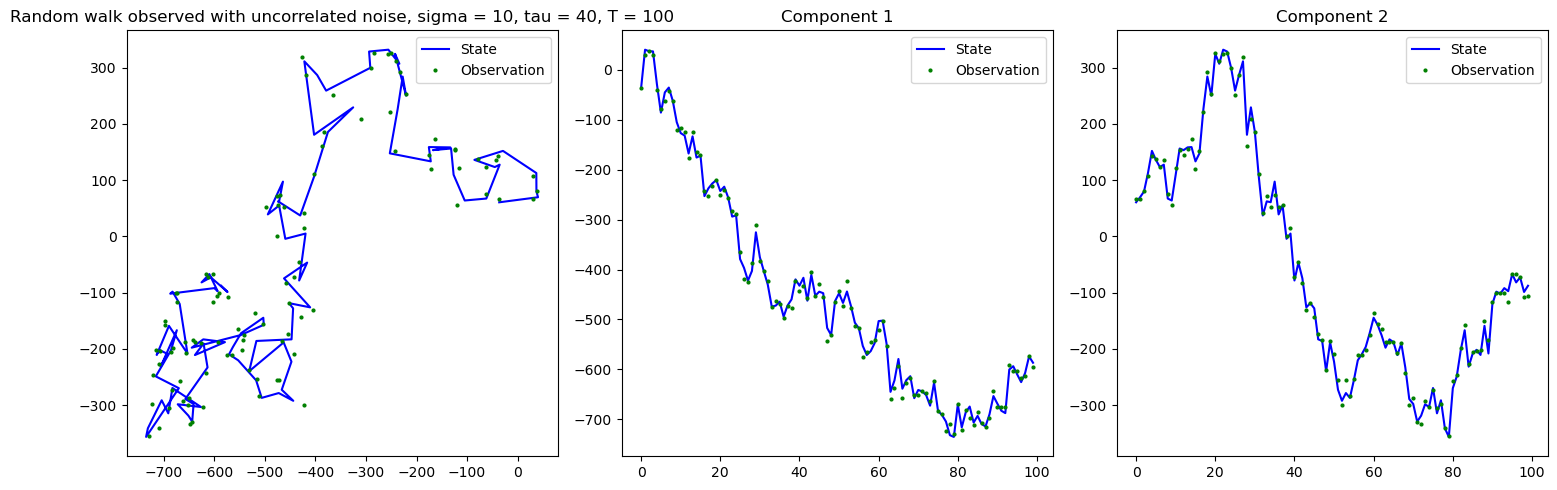

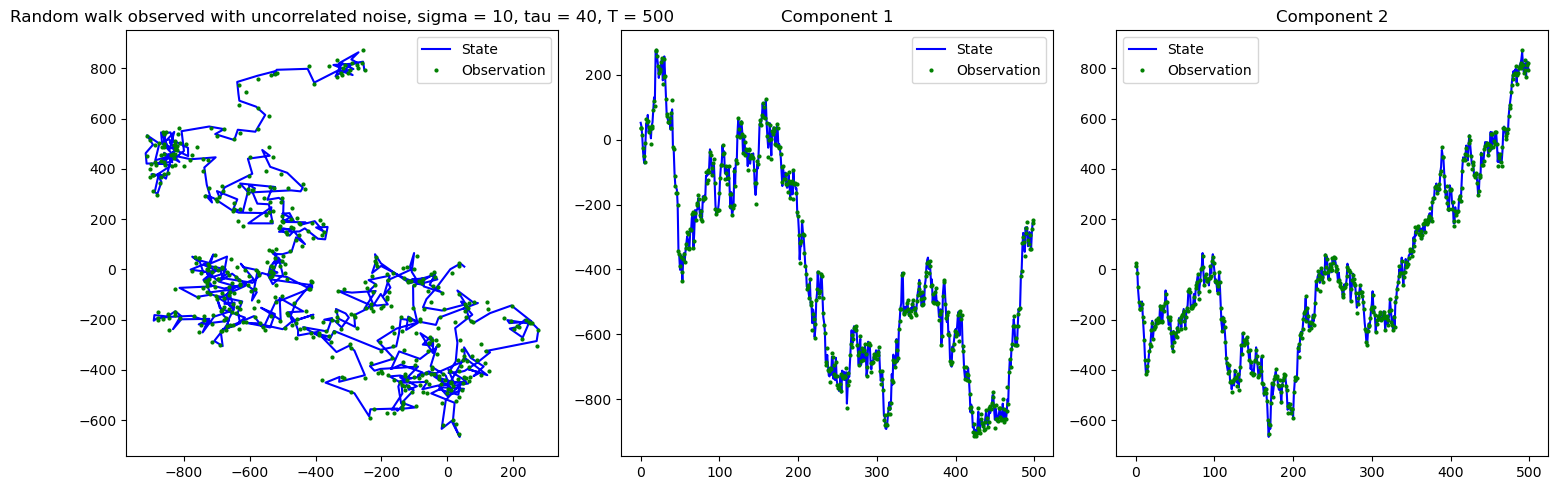

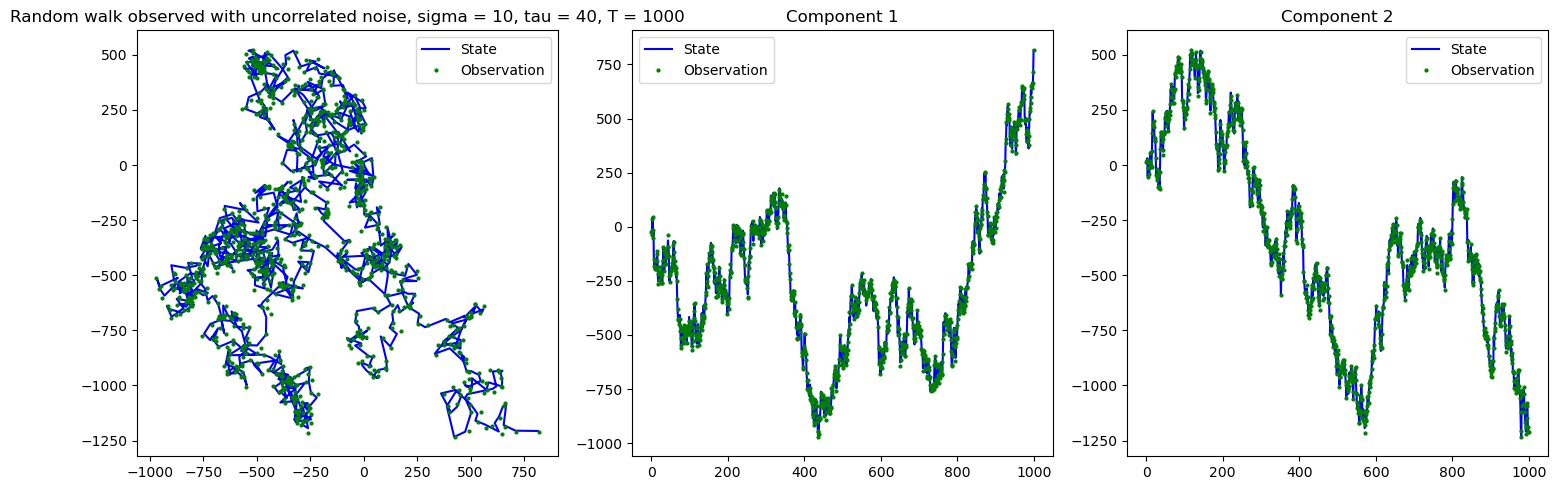

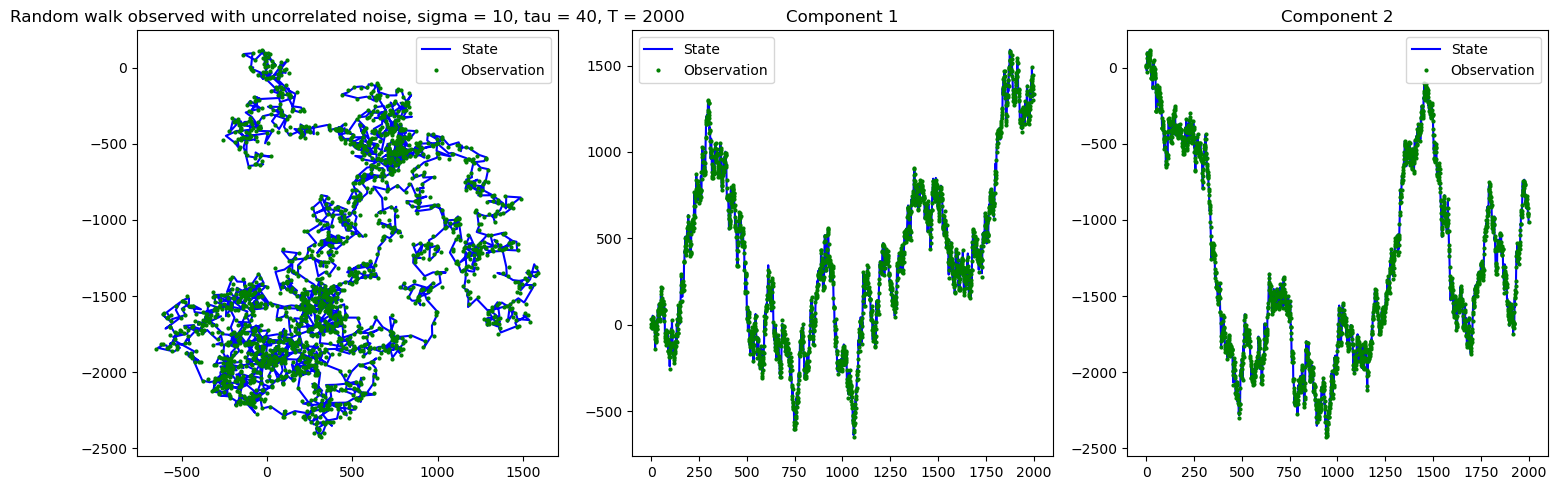

In [16]:
## Changing the parameters : ##

L_sigma = [0.1,1,5,10,20,50,100]
L_tau = [0.1,1,5,10,20,50,100]
L_T = [100,500,1000,2000]
x_0 = np.array([1, 2, -1])

def draw(sigma = 10, tau = 40, T = 500):
    Phi = np.eye(3)
    Psi = np.array([[1,0,0],[0,1,0]]) 
    Q = tau**2*np.eye(3)
    R = sigma**2*np.eye(2)
    X, Y = lingauss_simul(x_0, T, Phi, Psi, Q, R)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
    axes[0].plot(X[:, 0], X[:, 1], 'b', label='State')
    axes[0].plot(Y[:, 0], Y[:, 1], 'og', label='Observation', markersize=2)
    axes[0].set_title(f'Random walk observed with uncorrelated noise, sigma = {sigma}, tau = {tau}, T = {T}')
    axes[0].legend()
    for i in range(2):
        axes[i+1].plot(X[:, i], 'b', label='State')
        axes[i+1].plot(Y[:, i], 'og', label='Observation', markersize=2)
        axes[i+1].set_title(f'Component {i+1}')
        axes[i+1].legend()
    plt.tight_layout()
    plt.show()
    return()

for sigma in L_sigma:
    draw(sigma = sigma)
for tau in L_tau:
    draw(tau = tau)
for T in L_T:
    draw(T = T)

sigma = 10
tau = 40
T = 500

# Observations : #

Question 1.3]

$\tau$ is the variance of the white noise added to the state. It describes how random the pattern is : if $\tau$ is high, then the (absolute) values reached by the state process are likely to be high too.

$\sigma$ is the variance of the white noise added to the observation. It causes observation radomness which leads to the observations not following very well the state values for high values of $\sigma$.

T is the size of our sample (number of observations of our process)

# 2 - Kalman Filter
Let's code what we saw before [here](https://matfontaine.github.io/KALMAN/#/11). The two first line are called *the predictions* whereas 3., 4. and 5. are called *the updates*.

2.1. Complete the function `kalman_predict`

In [18]:
def kalman_predict(m, P, Phi, Q):
    """
    Perform the prediction step in the Kalman filter.
    Calculates the predictive distribution [X_{k+1} | Y_{1:k}].
    Arguments:
    m, P: mean and variance of the current filtering distribution (vector and matrix of size p respectively)
    Phi: p*p matrix defining the state dynamics
    Q: variance of the noise (p*p matrix) for the state equation
    Returns:
    mpred: column vector of size p * 1: mean of the predictive distribution.
    Ppred: p*p matrix: covariance of the predictive distribution.
    """
    m = m.T
    # Predicted mean
    mpred = Phi@m
    # Predicted covariance matrix
    Ppred = Phi@P@Phi.T + Q
    return mpred, Ppred

2.2. Complete the function `kalman_update`  ($S_t$ corresponds to $\Psi_t\Sigma_{t \mid t_-1} \Psi_t^\top + R$ in the given notation. It is called the *innovation covariance*)

In [19]:
def kalman_update(y, mpred, Ppred, Phi, Psi, Q, R):
    """
    Kalman update step:
    Arguments:
    mpred, Ppred: mean and variance of the current predictive distribution (returned by 'kalman_predict')
    y: vector of size q: new observation
    Phi, Psi: Matrices p*p and q*p defining the state dynamics and observation model
    Q, R: Variances of the noise for the state equation and observation equation of sizes p and q respectively
    Returns:
    mu, Pu: mean and covariance matrix of the filtering distribution after the update step
    """
    # Measurement residual (can be used to update mu)
    residual = y - np.dot(Psi, mpred)
    # Innovation covariance
    S =  Psi@Ppred@Psi.T+R
    # Kalman gain
    K = Ppred@Psi.T@np.linalg.inv(S)
    # Updated mean
    mu = mpred + K@residual
    # Updated covariance matrix
    Pu = Ppred - K@Psi@Ppred
    return mu, Pu

2.3. Finally, Write a function `kalman_filter` by completing the following model

In [20]:
def kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R):
    """
    Kalman Filter:
    Sequentially filters observations Y to reconstruct the signal X.
    Arguments:
    Y: observations: a matrix T * q
    m_0: column vector of size p * 1: prior mean of the initial state
    P_0: p*p matrix: prior variance of the initial state
    Phi, Psi: matrices defining the state dynamics and observation model
    Q, R: variances of the noise for the state equation and observation equation.
    Returns:
    M: Matrix of size T * p: posterior means
    Parray: Array of dimension p*p*T of successive filtering covariance matrices
    """
    dim_state = Phi.shape[0]  # dimension of the states
    dim_obs = Psi.shape[0]  # dimension of the observations
    T = Y.shape[0]

    # Initialization
    P = P_0
    m = m_0
    M = np.zeros((T, dim_state))
    Parray = np.zeros((dim_state, dim_state, T))

    for k in range(T):
        # Prediction
        mpred, Ppred = kalman_predict(m,P,Phi,Q)
        # Update
        mu,Pu = kalman_update(Y[k],mpred,Ppred,Phi,Psi,Q,R)
        # Reassignment of the current state
        m = mu
        P = Pu
        # Storage
        M[k, :] = mu.flatten()
        Parray[:, :, k] = Pu

    return M, Parray

**Application:** : Try your function `kalman_filter` on  data $Y$ generated through data in Exercise 1. You can use the code hereafter and answer the following questions: <br><br>
2.4. What do the two yellow stripes represent ?<br>
2.5. Try several set of paramterers $\sigma, \tau, T$ and observes the consequences on the filtering. 

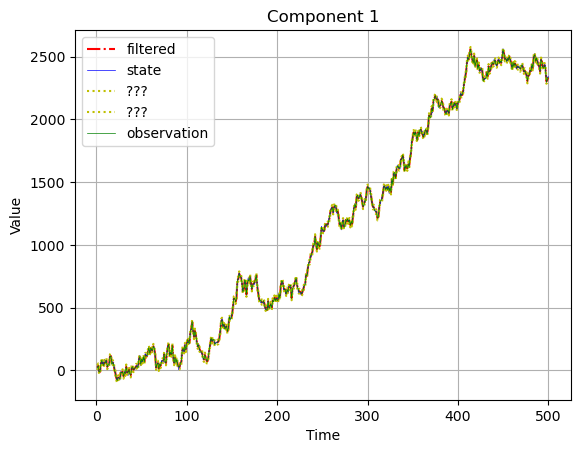

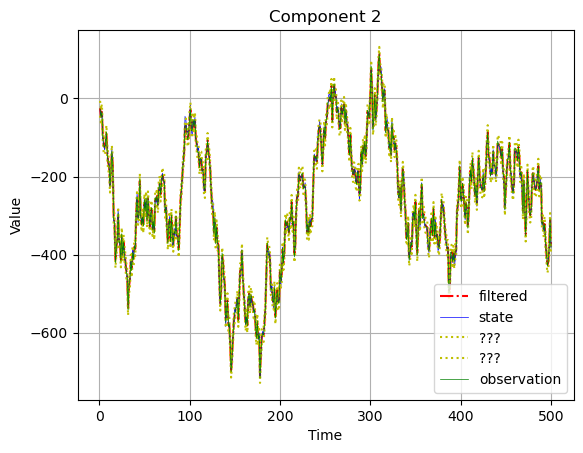

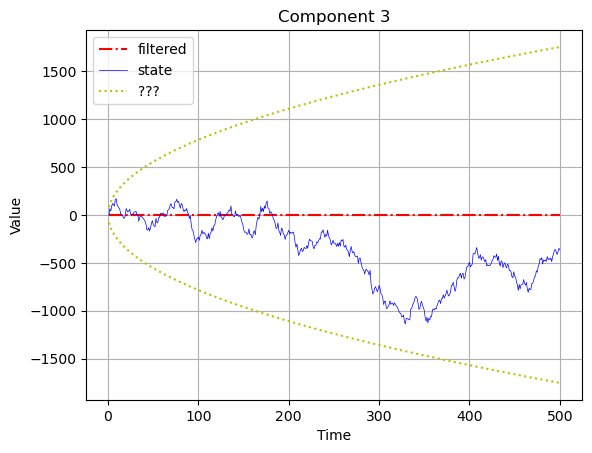

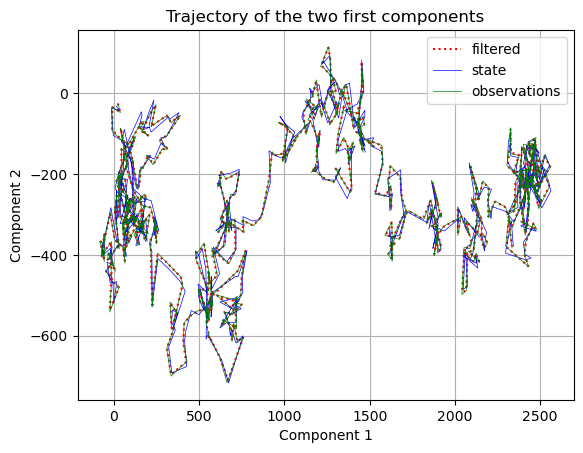

In [21]:
# Priors sur l'etat initial
m_0 = np.array([0, 0, 0])
P_0 = 100*np.eye(3)

# Filtrage
M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi, Q, R)

# Visualisation
plt.close('all')
for i in range(3):
    plt.figure(i+1)
    plt.plot(range(1, T+1), M[:, i], 'r', label='filtered', linestyle='dashdot')
    plt.plot(range(1, T+1), X[:, i], 'b', label='state', linewidth=0.5)
    sd = np.sqrt(Parray[i, i, :]) # Variance of each noise added to build the 95% confidence interval
    plt.plot(range(1, T+1), M[:, i] + 1.96 * sd, color = 'y', linestyle = 'dotted')
    plt.plot(range(1, T+1), M[:, i] - 1.96 * sd, color = 'y', linestyle = 'dotted')
    if i < 2:
        plt.plot(range(1, T+1), Y[:, i], 'g', linewidth=0.5)
        plt.legend(['filtered', 'state', '???','???', 'observation'])
    else:
        plt.legend(['filtered', 'state', '???'])
    plt.title(f'Component {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

plt.figure(4)
plt.plot(M[:, 0], M[:, 1], 'r', label='filtered', linestyle='dotted')
plt.plot(X[:, 0], X[:, 1], 'b', label='state', linewidth=0.5)
plt.plot(Y[:, 0], Y[:, 1], 'g', label='observations', linewidth=0.5)
plt.title('Trajectory of the two first components')
plt.legend()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

The two yellow lines are corresponding to the 95% confidence interval, since they are defined as :

$$M[:, i] \pm 1.96 * sd$$

And sd is defined as :

$$sd = \sqrt{Parray[i, i, :]}$$

Since Parray is an array of Covariance matrixes, we can deduce than $sd$ refers to the matrix of variances of the noise from the observation (every $\sigma_i^2$)

Since we consider $\sqrt{Parray[i, i, :]}$, we have :

$$sd = (\sigma_i)_{i \in T}$$

We then need to explain what is $1.96 * sd$

We know that for $X \sim N(0,1)$ :

$$P(|X| \leq 1.96) = 0.95$$

Using the density function :

$$\int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{- \frac{x^2}{2}} \,dx = 0.95$$

Thus obtaining for $X_i \sim N(0,\sigma_i^2)$, with $u = x \sigma_i$ substitution : 

$$\int_{-1.96}^{1.96} \frac{1}{\sqrt{2\pi}} e^{- \frac{x^2}{2}} \,dx = 0.95$$

$$\int_{-1.96\sigma_i}^{1.96\sigma_i} \frac{1}{\sqrt{2\pi\sigma_i}} e^{- \frac{u^2}{2\sigma_i^2}} \,du = 0.95$$

Which using the density function of $X_i$ is equivalent to :

$$P(|X_i| \leq 1.96\sigma_i) = 0.95$$

___

#### The two yellow stripes are corresponding to the 95% confidence interval of the Kalman Filtering ####

___

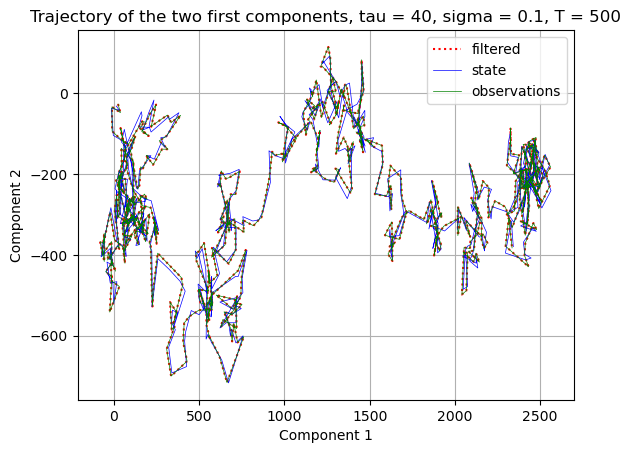

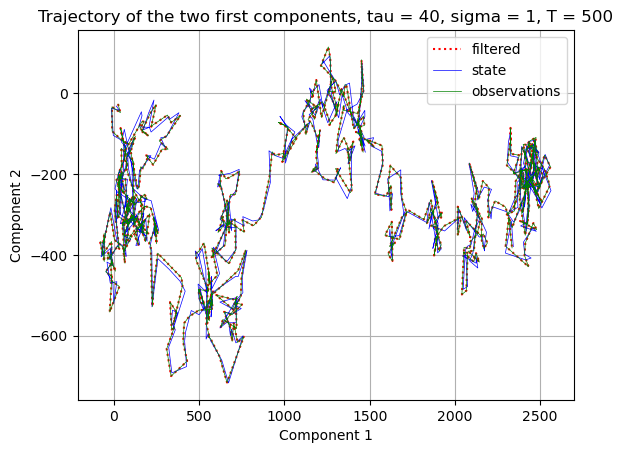

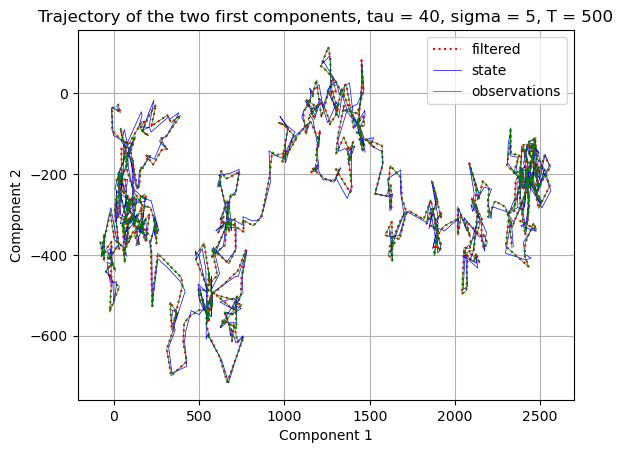

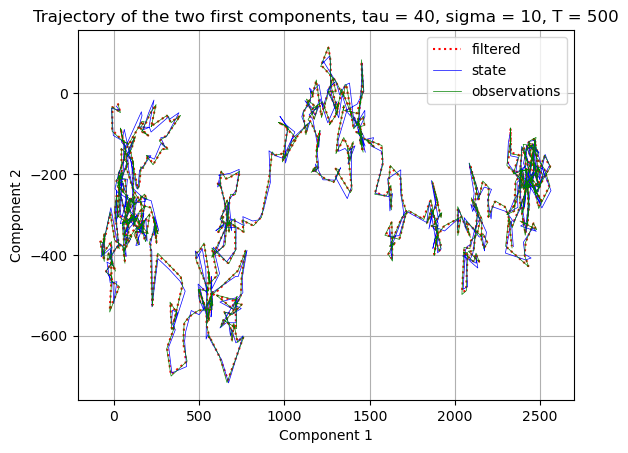

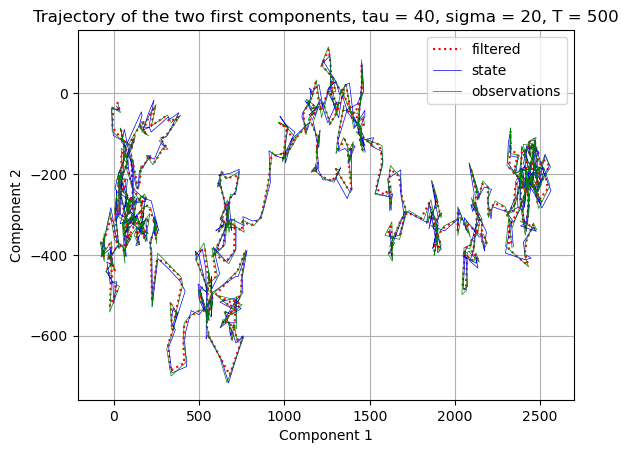

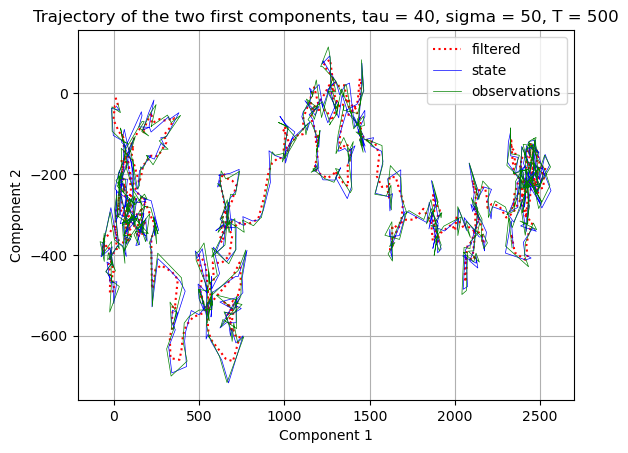

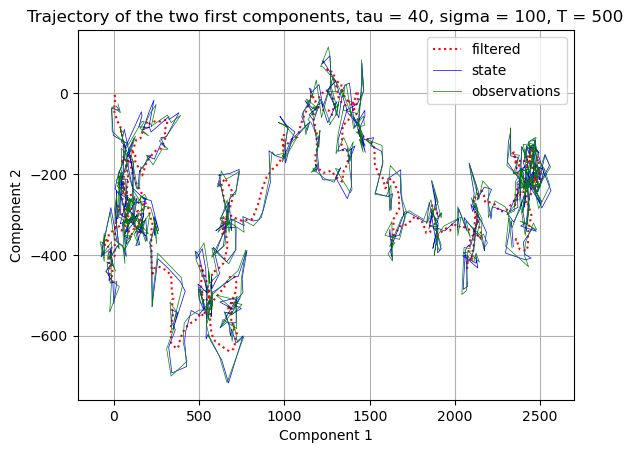

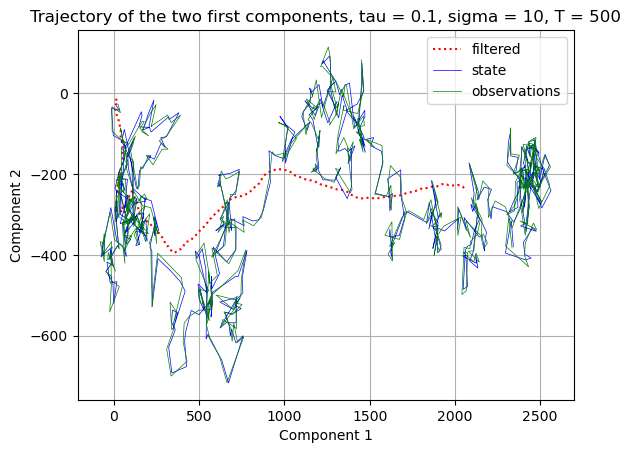

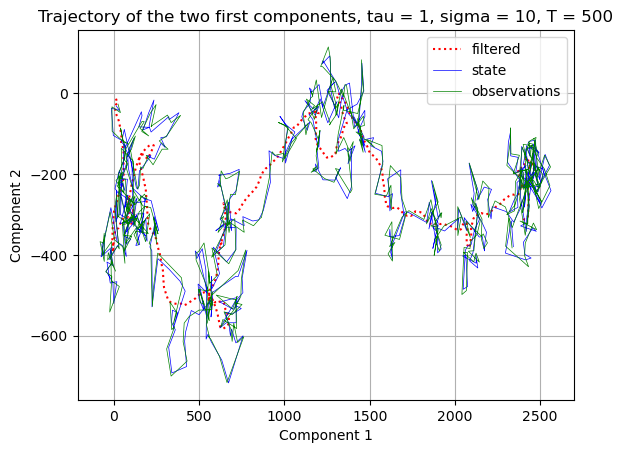

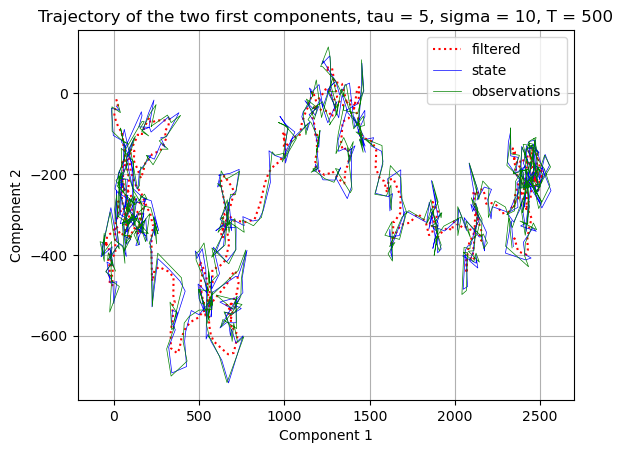

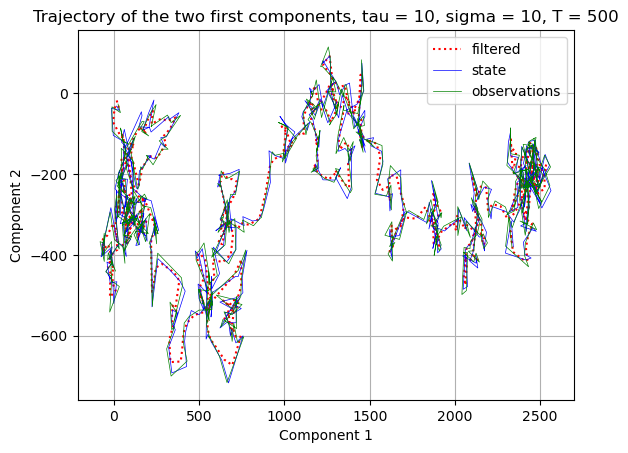

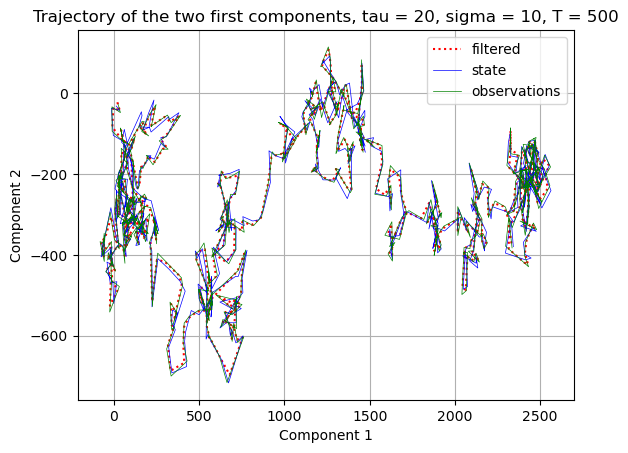

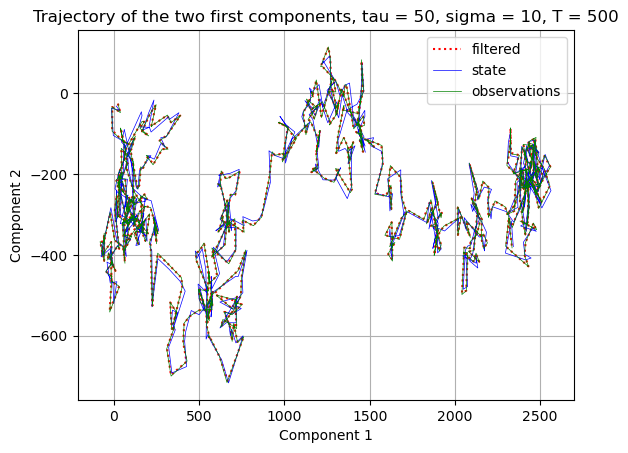

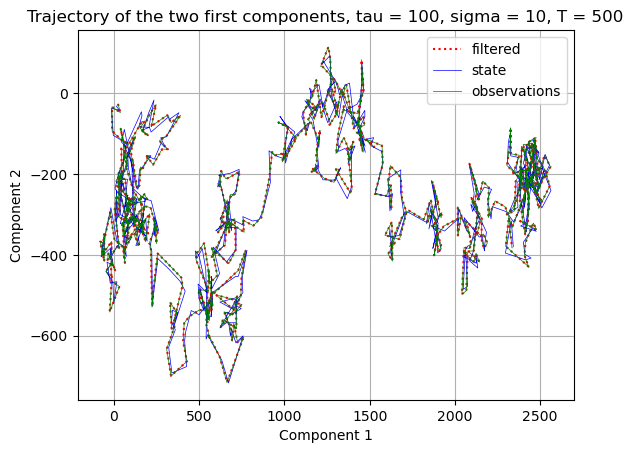

In [27]:
## Changing the parameters : ##

L_sigma = [0.1,1,5,10,20,50,100]
L_tau = [0.1,1,5,10,20,50,100]
L_T = [100,500,1000,2000]
x_0 = np.array([1, 2, -1])

def draw(sigma = 10, tau = 40, T = 500):
    Q = tau**2*np.eye(3)
    R = sigma**2*np.eye(2)
    m_0 = np.array([0, 0, 0])
    P_0 = 100*np.eye(3)
    M, Parray = kalman_filter(Y, m_0, P_0, Phi, Psi,Q,R)
    plt.close('all')
    plt.plot(M[:, 0], M[:, 1], 'r', label='filtered', linestyle='dotted')
    plt.plot(X[:, 0], X[:, 1], 'b', label='state', linewidth=0.5)
    plt.plot(Y[:, 0], Y[:, 1], 'g', label='observations', linewidth=0.5)
    plt.title(f'Trajectory of the two first components, tau = {tau}, sigma = {sigma}, T = {T}')
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

for sigma in L_sigma:
    draw(sigma = sigma)
for tau in L_tau:
    draw(tau = tau)

We can observe that if $\tau << \sigma$, the Kalman filtering looks like a moving average (over the observed values). Otherwise, if $\tau >> \sigma$, the Kalman filtering diesn't have much influence on the curves, and the kalman filtered curve is following the observation curve. The best tradeoff between moving average and adjusting the values would be $\tau \sim \sigma$

# 3 - Modification of the observation

The observation problem is modified as follows: instead of observing the 'projection' of the random walk onto the plane $(O, x1, x2)$, we observe its projection onto a plane that has undergone two successive rotations of angles $\varphi_B$ and $\vartheta_B$ around the axes $(Oy)$ and $(Ox)$. This modification corresponds to a new observation matrix $\Psi$ defined as follows (with arbitrary values of $\varphi_B$ and $\vartheta_B$) 

In [9]:
# Define rotation angles
azi_Psi = np.pi / 3
elev_Psi = np.pi / 3

# Define rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(azi_Psi), -np.sin(azi_Psi)],
               [0, np.sin(azi_Psi), np.cos(azi_Psi)]])
Ry = np.array([[np.cos(elev_Psi), 0, -np.sin(elev_Psi)],
               [0, 1, 0],
               [np.sin(elev_Psi), 0, np.cos(elev_Psi)]])

Psi = Psi @ Rx @ Ry
print(Psi)

[[ 0.5        0.        -0.8660254]
 [-0.75       0.5       -0.4330127]]


Questions:
3. Explain briefly what is the difference with the previous observation matrix. (you can use for instance the filtering results of the different component to explain what you observe)

The result is that at first we don't use the third dimension, and we only filter on the two firsts. If we rotate the coordinate system, it implies that we now filter less on the first two and a bit on the third (in fact, we can see that there is no filtering on the third coordinates, and that the 95% confidence interval is only a growing square root, and not following the observation curve).